In [33]:
#Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, f_oneway, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings("ignore")
# utility function
from student import drop_columns

**Loading and Inspecting data**

In [34]:
#Loading the dataset and display the first few rows
df = pd.read_csv("global_cancer_patients_2015_2024.csv")
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [35]:
#Check for the columns in the dataframe
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

In [36]:
#Show the number of rows and columns in the dataset
print(f'The dataframe contains {df.shape[0]} rows')
print(f'The dataframe contains {df.shape[1]} columns')

The dataframe contains 50000 rows
The dataframe contains 15 columns


In [37]:
# Get the basic information and concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [38]:
#checking the summary statistics of the dataset
df.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462,4.951207
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335,1.199677
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


In [39]:
# Check for the duplicates in the dataframe 
df.duplicated().sum()

0

There are no duplicates in the dataframe so the dataframe will remain unchanged 

In [40]:
#Check for the data types of the columns in the dataframe
df.dtypes

Patient_ID                object
Age                        int64
Gender                    object
Country_Region            object
Year                       int64
Genetic_Risk             float64
Air_Pollution            float64
Alcohol_Use              float64
Smoking                  float64
Obesity_Level            float64
Cancer_Type               object
Cancer_Stage              object
Treatment_Cost_USD       float64
Survival_Years           float64
Target_Severity_Score    float64
dtype: object

In [41]:
# Checking for missing values in the dataset
df.isna().sum()

Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64

There aren't any missing values in the dataframe so the dataframe will remain unchanged .We now check for outliers in the dataframe.

In [42]:


# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Dictionary to store outlier indices per feature
outlier_indices = {}

# Loop through each numeric column to compute IQR and find outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    outlier_indices[col] = outliers.index.tolist()
    
    print(f"Column: {col}")
    print(f"Number of outliers: {len(outliers)}")
    print("-" * 40)


Column: Age
Number of outliers: 0
----------------------------------------
Column: Year
Number of outliers: 0
----------------------------------------
Column: Genetic_Risk
Number of outliers: 0
----------------------------------------
Column: Air_Pollution
Number of outliers: 0
----------------------------------------
Column: Alcohol_Use
Number of outliers: 0
----------------------------------------
Column: Smoking
Number of outliers: 0
----------------------------------------
Column: Obesity_Level
Number of outliers: 0
----------------------------------------
Column: Treatment_Cost_USD
Number of outliers: 0
----------------------------------------
Column: Survival_Years
Number of outliers: 0
----------------------------------------
Column: Target_Severity_Score
Number of outliers: 151
----------------------------------------


There are **151 outliers** detected in the `Target_Severity_Score` column based on the IQR method, and they will be **dropped** to improve model reliability.


In [43]:
# Handling Outliers in Target_Severity_Score
#During exploratory data analysis, outliers were identified in the Target_Severity_Score column using the Interquartile Range (IQR) method. A total of 151 outliers were detected. Given that the dataset contains a sufficient number of records, these outliers were removed to reduce their potential impact on model performance and to ensure more stable and reliable predictions. This step was taken to improve model generalization and reduce the risk of overfitting due to extreme values.

In [44]:
df = df[(df['Target_Severity_Score'] >= lower_bound) & (df['Target_Severity_Score'] <= upper_bound)]


In [45]:
#Checking agin to see the basic information of the dataset after dropping the outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49849 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             49849 non-null  object 
 1   Age                    49849 non-null  int64  
 2   Gender                 49849 non-null  object 
 3   Country_Region         49849 non-null  object 
 4   Year                   49849 non-null  int64  
 5   Genetic_Risk           49849 non-null  float64
 6   Air_Pollution          49849 non-null  float64
 7   Alcohol_Use            49849 non-null  float64
 8   Smoking                49849 non-null  float64
 9   Obesity_Level          49849 non-null  float64
 10  Cancer_Type            49849 non-null  object 
 11  Cancer_Stage           49849 non-null  object 
 12  Treatment_Cost_USD     49849 non-null  float64
 13  Survival_Years         49849 non-null  float64
 14  Target_Severity_Score  49849 non-null  float64
dtypes:

In [46]:
#Checking to see the shape of the dataset
print(f'The dataframe now contains {df.shape[0]} rows')
print(f'The dataframe now contains {df.shape[1]} columns')

The dataframe now contains 49849 rows
The dataframe now contains 15 columns


In [47]:
#Dropping the irrelevant columns that are not needed for the analysis and modeling
drop_cols = ['Patient_ID', 'Country_Region', 'Year', 'Age','Gender','Treatment_Cost_USD']
df = drop_columns(df, drop_cols)

Below we are binarizing the `Target_Severity_Score` column into two categories: `High` and `Low`. The threshold for categorization is set at 0 for `Low` and above 0 for `High`. This will help in simplifying the target variable for classification tasks.The binarized column will be named `Target`.

Patients with severity score greater or equal to the median get 1 (high severity)

Patients with severity score less than the median get 0 (low severity)

In [48]:

threshold = df['Target_Severity_Score'].median()  

df['Severity_Target'] = (df['Target_Severity_Score'] >= threshold).astype(int)


In [49]:
df.columns

Index(['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking',
       'Obesity_Level', 'Cancer_Type', 'Cancer_Stage', 'Survival_Years',
       'Target_Severity_Score', 'Severity_Target'],
      dtype='object')

We create a column `Severity_Score_Level` just to categorize the `Target_Severity_Score` into `High` and `Low` based on the threshold of 0 and the `Survival_Score_Level` to categorize into > 5 and <= 5. This will help in understanding the severity levels in a more intuitive way.

In [50]:
# Create a new column 'Survival_Score_Level' based on Survival_Years
df['Survival_Score_Level'] = df['Survival_Years'].apply(lambda x: '>5' if x > 5 else '<=5')
df.head()

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Survival_Years,Target_Severity_Score,Severity_Target,Survival_Score_Level
0,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,5.9,4.92,0,>5
1,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,4.7,4.65,0,<=5
2,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,7.1,5.84,1,>5
3,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,1.6,3.12,0,<=5
4,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,2.9,3.62,0,<=5


In [51]:
# Create a new column called Severity_Level based on the condition
df['Severity_Score_Level'] = df['Target_Severity_Score'].apply(lambda x: 'High' if x > 5 else 'Low')
df.head()


,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Survival_Years,Target_Severity_Score,Severity_Target,Survival_Score_Level,Severity_Score_Level
0,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,5.9,4.92,0,>5,Low
1,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,4.7,4.65,0,<=5,Low
2,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,7.1,5.84,1,>5,High
3,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,1.6,3.12,0,<=5,Low
4,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,2.9,3.62,0,<=5,Low


Create the Target Column for the Survival Years
If Survival_Years > 5: 1 (survived more than 5 years)

If Survival_Years <= 5: 0 (did not survive more than 5 years)

In [52]:
df['Survived_Target'] = (df['Survival_Years'] > 5).astype(int)


In [53]:
df.head()

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Survival_Years,Target_Severity_Score,Severity_Target,Survival_Score_Level,Severity_Score_Level,Survived_Target
0,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,5.9,4.92,0,>5,Low,1
1,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,4.7,4.65,0,<=5,Low,0
2,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,7.1,5.84,1,>5,High,1
3,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,1.6,3.12,0,<=5,Low,0
4,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,2.9,3.62,0,<=5,Low,0


In [54]:
#We check again to see the columns that we have
print(f'We now have {df.shape[1]} columns in the dataframe after dropping the irrelevant columns and feature engineering')

We now have 13 columns in the dataframe after dropping the irrelevant columns and feature engineering


**Visualizations**

The boxplot below shows the distribution of 'Survival_Years' for each 'Cancer_Stage'.
Interpretation:
- The central line in each box represents the median survival years for that cancer stage.
- The box shows the interquartile range (IQR), where the middle 50% of survival years lie.
- Whiskers extend to show the range of most of the data, excluding outliers.
- By comparing boxes, you can see which cancer stages have higher or lower median survival, and how variable survival is within each stage.
- Stage 0 has a higher median and a taller box, patients in this stage tend to survive longer and have more variation in survival years compared to later stages.
- Stage IV has the lowest median survival years, indicating poorer outcomes for patients in this stage.

In [55]:
# Calculate the average survival years by cancer stage
avg_survival_by_stage = df.groupby('Cancer_Stage')['Survival_Years'].mean()
print(avg_survival_by_stage)

Cancer_Stage
Stage 0      5.012644
Stage I      5.013586
Stage II     4.995588
Stage III    5.035590
Stage IV     4.970938
Name: Survival_Years, dtype: float64


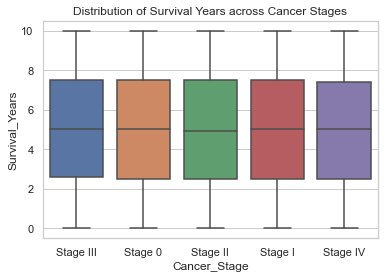

In [56]:
sns.boxplot(x='Cancer_Stage', y='Survival_Years', data=df)
plt.title("Distribution of Survival Years across Cancer Stages")
plt.show()


This plot shows the distribution of patients based on the severity of their cancer, categorized as High or Low. It helps visualize how many patients fall into each severity level, providing insight into the overall severity burden within the dataset.

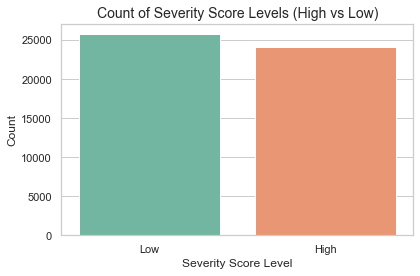

In [57]:


# Set the plot style
sns.set(style="whitegrid")

# Plot the count of High and Low severity levels
plt.figure(figsize=(6, 4))
sns.countplot(x='Severity_Score_Level', data=df, palette='Set2')

# Add titles and labels
plt.title('Count of Severity Score Levels (High vs Low)', fontsize=14)
plt.xlabel('Severity Score Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


From the countplot we can see that the low severity score is the most common then the high severity score meaning that most of the incidents are not severe.

In [58]:
#checking the value counts of the Severity score levels
df["Severity_Score_Level"].value_counts()

Low     25790
High    24059
Name: Severity_Score_Level, dtype: int64

In [59]:
df['Cancer_Type'].value_counts()

Colon       6355
Prostate    6293
Leukemia    6248
Liver       6225
Skin        6208
Cervical    6200
Breast      6179
Lung        6141
Name: Cancer_Type, dtype: int64

We now plot a correlation heatmap to visualize the relationships between different features in the dataset. The heatmap shows how strongly each pair of features is correlated, with darker colors indicating stronger correlations.

In [60]:
cols_for_corr = ['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level', 'Treatment_Cost_USD', 'Survival_Years', 'Target_Severity_Score']

plt.figure(figsize=(12, 8))
sns.heatmap(df[cols_for_corr].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()

KeyError: "['Treatment_Cost_USD'] not in index"

<Figure size 864x576 with 0 Axes>

From the heatmap we can see that the `Target_Severity_Score` has a positive correlation with `Genetic_Risk`,`Air_Pollution`,`Alcohol_Use`,`Smoking` and `Obesity_Levels` which means that as these factors increase, the severity score also tends to increase. This suggests that these are significant factors may contribute to higher cancer severity.


We create a new binary column in the dataframe and plot a countplot to visualize the survival status of patients based on their survival years.

```python

If a patient survived more than 5 years (Survival_Years > 5), it assigns a value of 1.

Otherwise (5 years or less), it assigns a value of 0.

So now:

1 = Patient survived more than 5 years

0 = Patient survived 5 years or less



In [ ]:
df['Survived_5_Years'] = (df['Survival_Years'] > 5).astype(int)


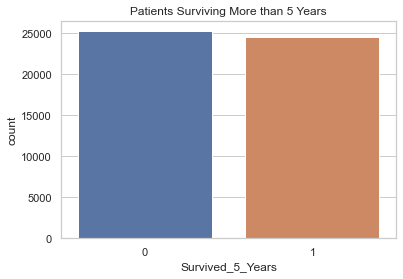

In [ ]:
sns.countplot(x='Survived_5_Years', data=df)
plt.title("Patients Surviving More than 5 Years")
plt.show()


So from the countplot we can see that most of the patients survived less than 5 years which indicates that the dataset may contain a significant number of patients with poor prognosis or advanced cancer stages.

Finally, we plot a bar chart to visualize the average survival years for each cancer stage. This helps us understand how survival varies across different stages of cancer.

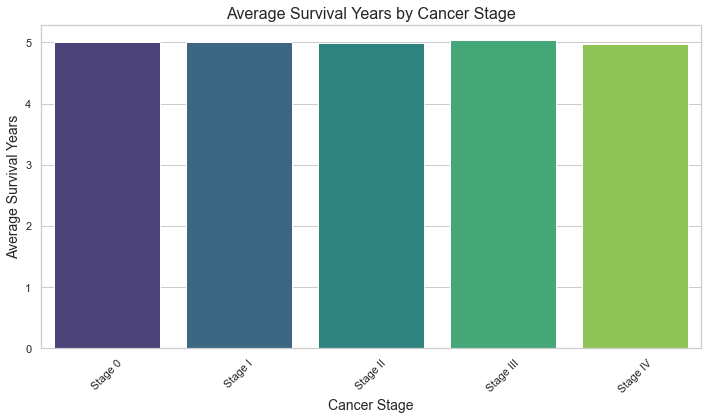

In [ ]:
# we plot a bar chart to visualize the average survival years for each cancer stage
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_survival_by_stage.index, y=avg_survival_by_stage.values, palette='viridis')
plt.title('Average Survival Years by Cancer Stage', fontsize=16)
plt.xlabel('Cancer Stage', fontsize=14)
plt.ylabel('Average Survival Years', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df["Survived_5_Years"].value_counts()


0    25268
1    24581
Name: Survived_5_Years, dtype: int64

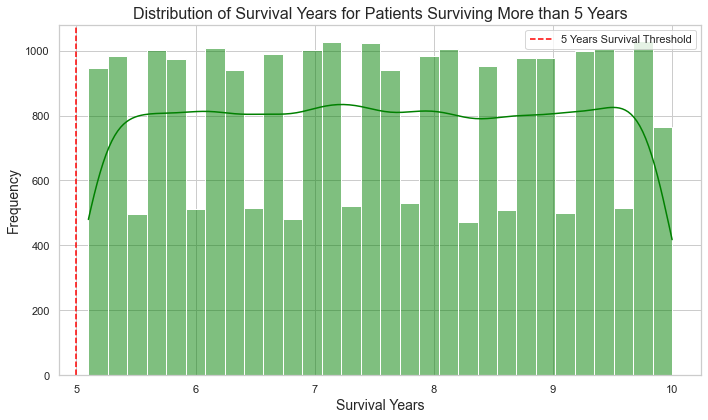

In [ ]:
#We plot the distribution of survival years for patients who survived more than 5 years
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Survived_5_Years'] == 1]['Survival_Years'], bins=30, kde=True, color='green')
plt.title('Distribution of Survival Years for Patients Surviving More than 5 Years', fontsize=16)   
plt.xlabel('Survival Years', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(x=5, color='red', linestyle='--', label='5 Years Survival Threshold')
plt.legend()
plt.tight_layout()
plt.show();

The plot above shows the distribution of survival years for patients who survived more than 5 years. Most patients in this group survived between 5 and 10 years, with the frequency decreasing as survival years increase. The red dashed line at 5 years marks the threshold used to define long-term survival. This visualization highlights that while some patients achieve extended survival, the majority cluster closer to the 5-year mark, indicating that surviving significantly longer than 5 years is less common.

**Hypothesis Testing**
In this section we will perform hypothesis testing to investigate whether there are significant differences in survival years across different cancer stages.This analysis investigates whether survival outcomes differ significantly across cancer stages by  testing for normality using the Shapiro-Wilk test and checking for equal variances with Levene’s test. If assumptions are met, a One-Way ANOVA is conducted, followed by Tukey’s HSD post-hoc test if significant, to identify which cancer stages show meaningful differences in survival—addressing the second objective of the project.


Null Hypothesis (H₀):
There is no significant difference in the median survival years among patients at different cancer stages.

Alternative Hypothesis (H₁):
There is a significant difference in the median survival years among patients at different cancer stages.

In [ ]:
# Test normality within each stage
for stage in df['Cancer_Stage'].unique():
    stat, p = shapiro(df[df['Cancer_Stage'] == stage]['Survival_Years'])
    print(f'Shapiro test for {stage}: p-value={p}')

# Test homogeneity of variances
stat, p = levene(*[df[df['Cancer_Stage'] == stage]['Survival_Years'] for stage in df['Cancer_Stage'].unique()])
print(f'Levene test p-value={p}')

# If assumptions met:
stat, p = f_oneway(*[df[df['Cancer_Stage'] == stage]['Survival_Years'] for stage in df['Cancer_Stage'].unique()])
print(f'ANOVA p-value={p}')

# If significant, do post-hoc Tukey test
if p < 0.05:
    tukey = pairwise_tukeyhsd(endog=df['Survival_Years'], groups=df['Cancer_Stage'], alpha=0.05)
    print(tukey)


Shapiro test for Stage III: p-value=0.0
Shapiro test for Stage 0: p-value=0.0
Shapiro test for Stage II: p-value=0.0
Shapiro test for Stage I: p-value=0.0
Shapiro test for Stage IV: p-value=0.0
Levene test p-value=0.77905976235781
ANOVA p-value=0.5973811921947265


The shapiro wilk test reults show that the survival years are not normally diastributed (p-value < 0.05), indicating that the assumption of normality is violated.So we will use the Kruskal-Wallis test instead of ANOVA to compare survival years across cancer stages.
The Anova pvalue is 0.59738 we fail to reject the null hypothesis, indicating that there is no significant difference in survival years across different cancer stages. 

In [ ]:
from scipy.stats import kruskal

groups = [df[df['Cancer_Stage'] == stage]['Survival_Years'] for stage in df['Cancer_Stage'].unique()]
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis test p-value = {p}")


Kruskal-Wallis test p-value = 0.598630361474873


From the Kruskal wallis test we now conclude that cancer stage does not significantly impact survival years 

In [ ]:
df.dtypes

Genetic_Risk             float64
Air_Pollution            float64
Alcohol_Use              float64
Smoking                  float64
Obesity_Level            float64
Cancer_Type               object
Cancer_Stage              object
Treatment_Cost_USD       float64
Survival_Years           float64
Target_Severity_Score    float64
Severity_Target            int32
Survival_Score_Level      object
Severity_Score_Level      object
Survived_Target            int32
Survived_5_Years           int32
dtype: object

We do pairplot to visualize the two target variables `Survived_Target` and `Severity_Target` to against the features in the dataset. This helps us understand how these two target variables relate to other features.

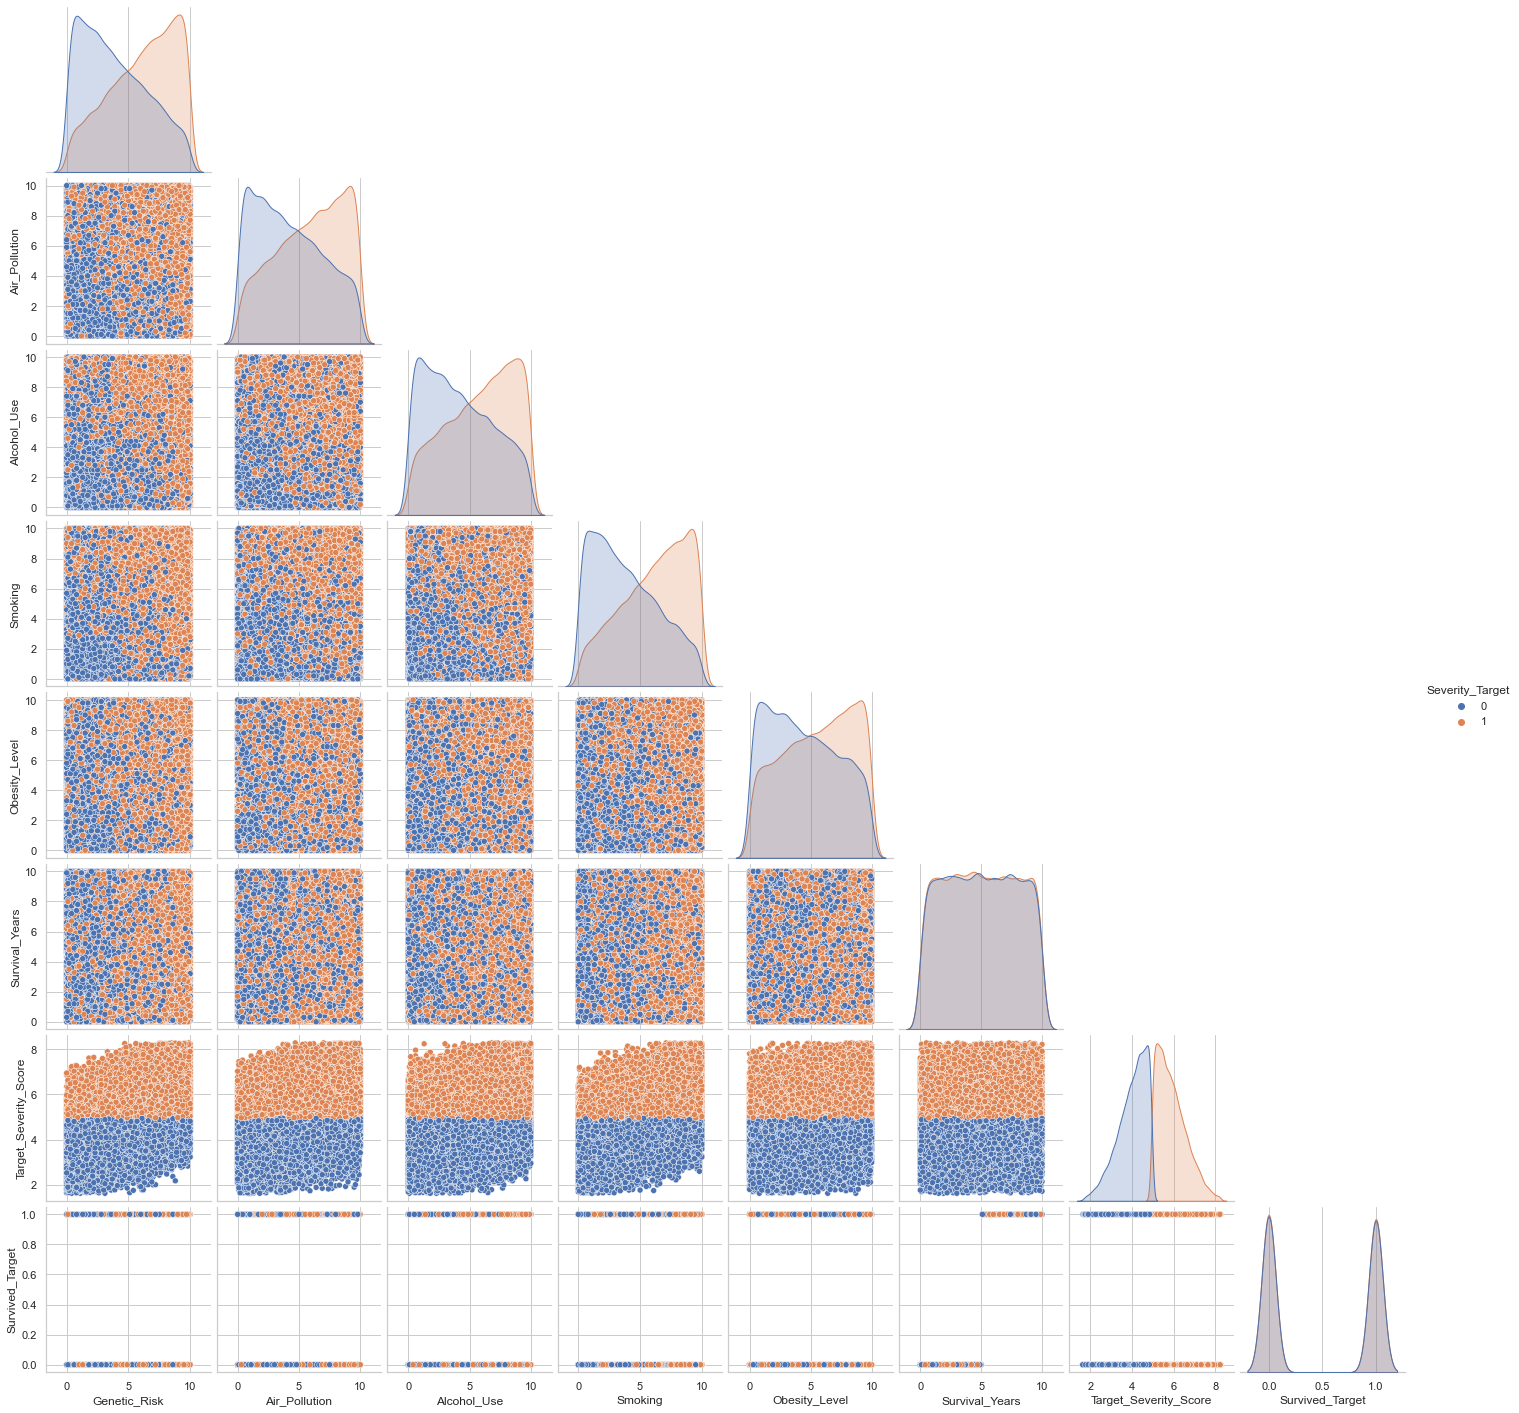

In [ ]:
sns.pairplot(df,corner = True,hue = "Severity_Target");

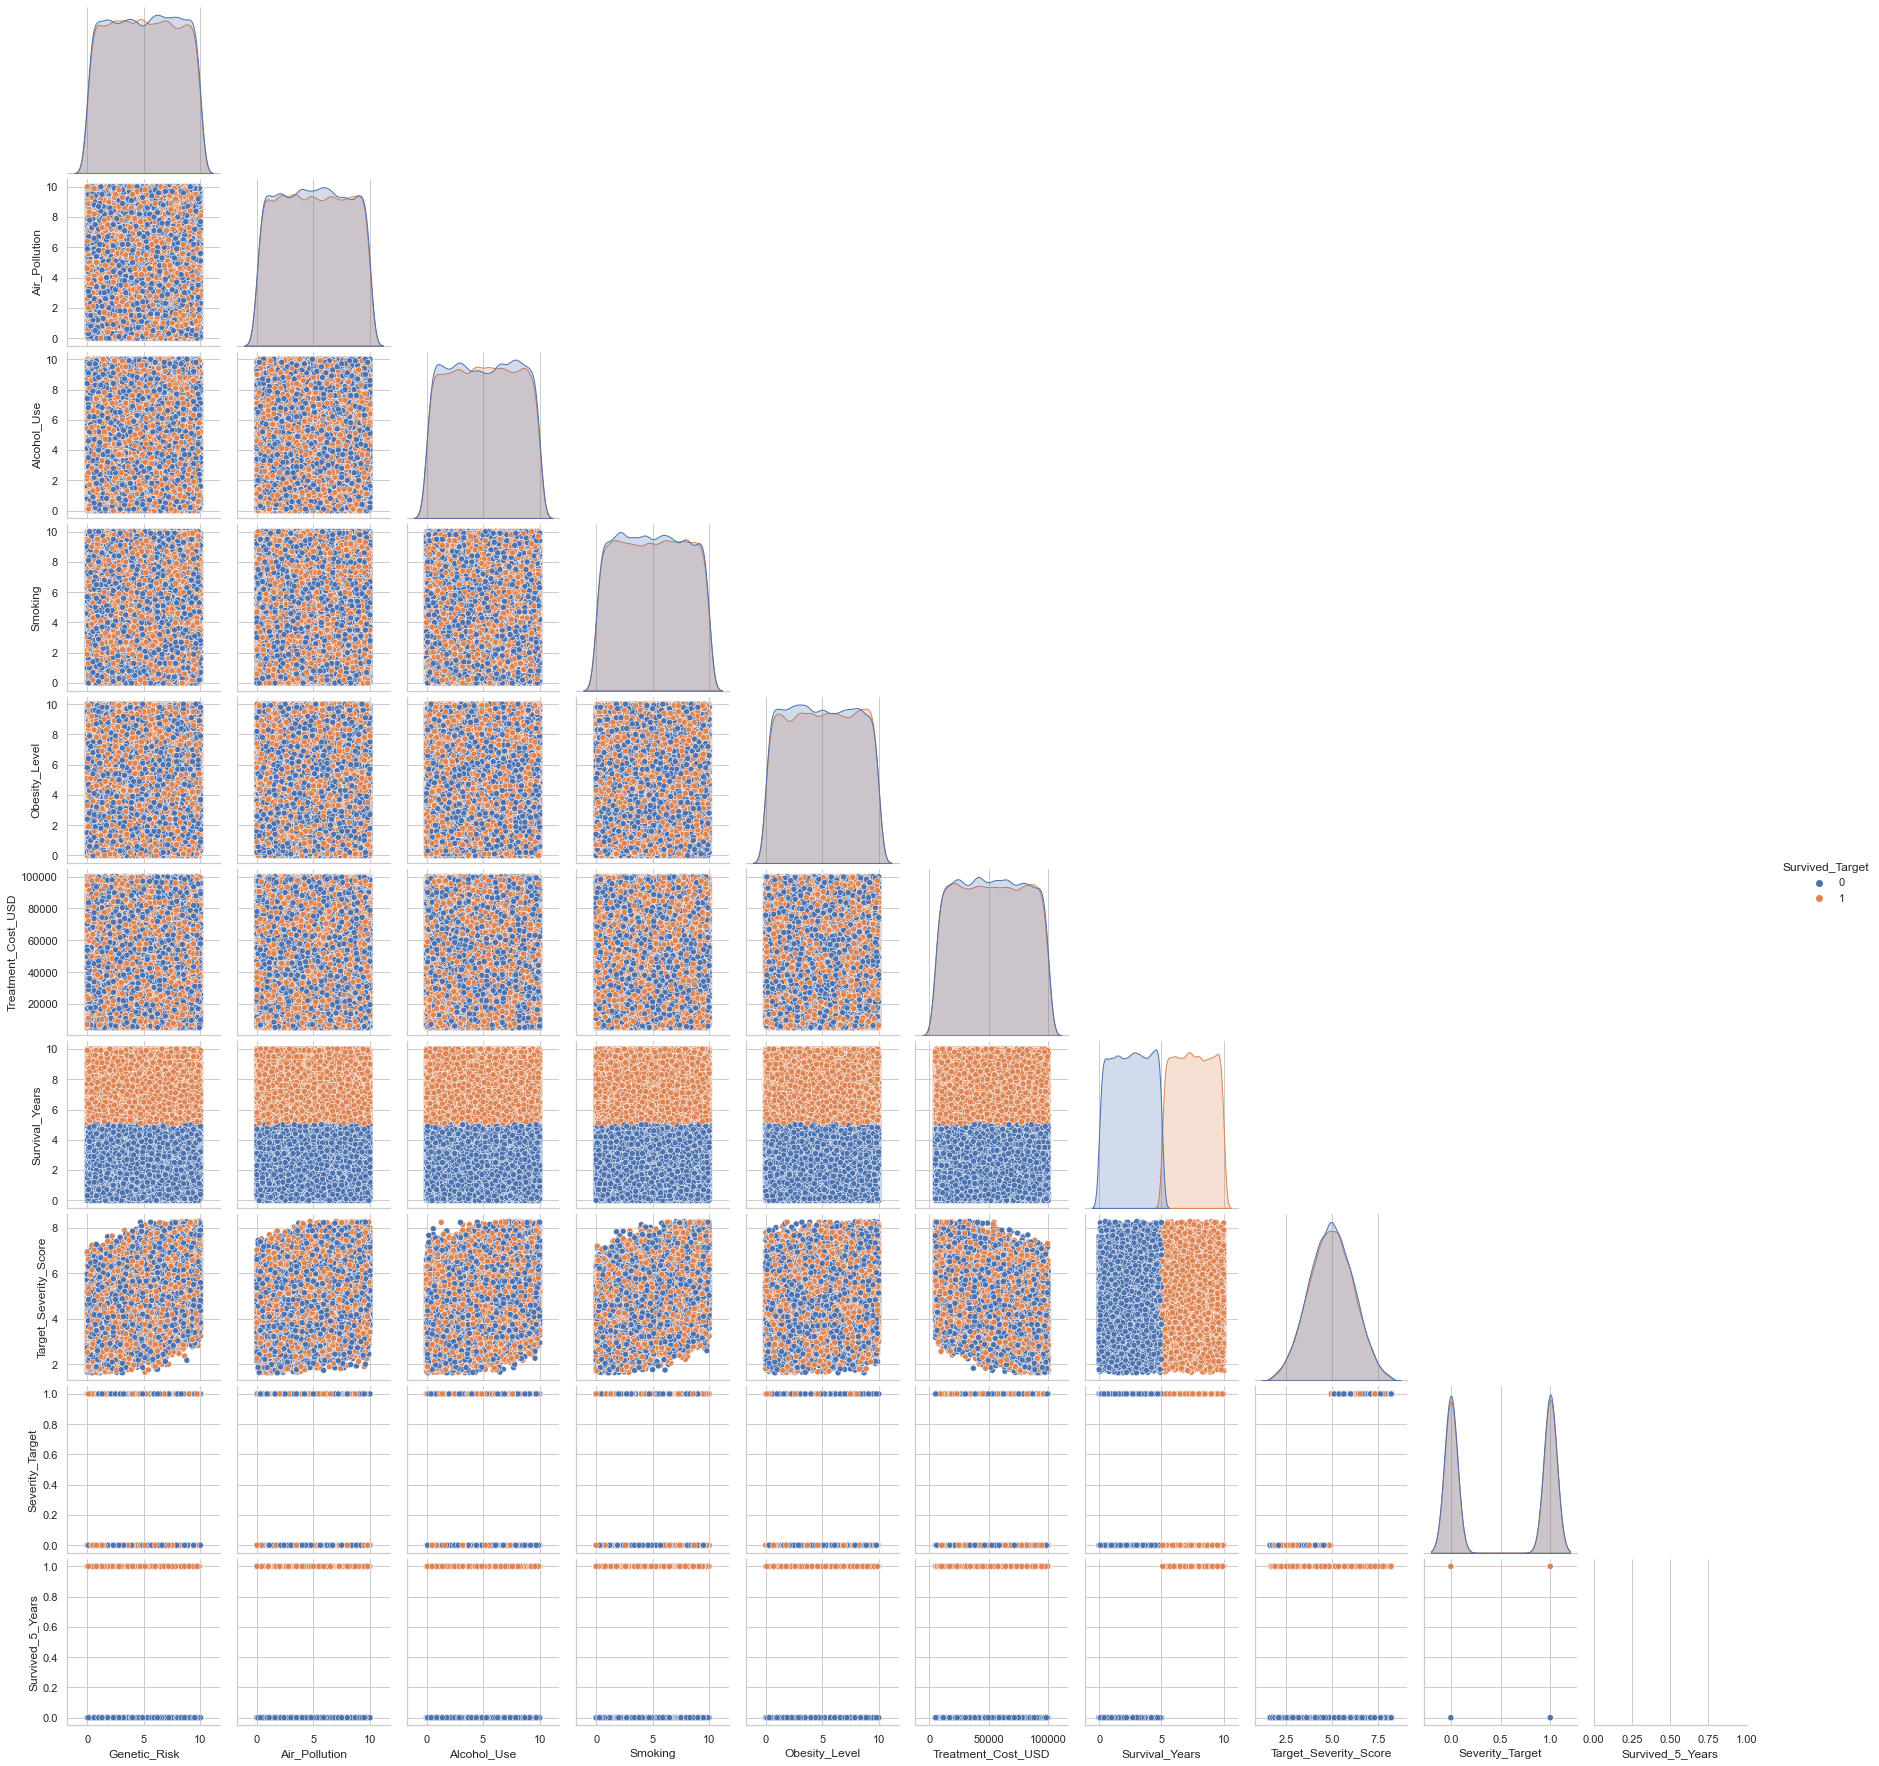

In [ ]:
sns.pairplot(df,corner = True,hue = ("Survived_Target"));

The pairplots above show the relationships between the two target variables (`Survived_Target` and `Severity_Target`) and the features in the dataset. Each plot displays how one feature relates to another, colored by the target variable the plots showing the survival and severity status of patients.

Next we are going to do a one-hot encoding of the categorical variables in the dataset. This will convert categorical variables into a format that can be provided to machine learning algorithms to do a better job in prediction.

In [ ]:
df.columns

Index(['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking',
       'Obesity_Level', 'Cancer_Type', 'Cancer_Stage', 'Survival_Years',
       'Target_Severity_Score', 'Severity_Target', 'Survival_Score_Level',
       'Severity_Score_Level', 'Survived_Target'],
      dtype='object')

In [61]:
#Dropping the columns that are not needed for modelling
cols = ['Target_Severity_Score', 'Survival_Years','Survival_Score_Level', 'Severity_Score_Level']
df1 = drop_columns(df, cols)
df1.head()

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Severity_Target,Survived_Target
0,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,0,1
1,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,0,0
2,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,1,1
3,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,0,0
4,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,0,0


In [ ]:
# # Encoding the categorical variables
# def encode_categorical_columns(df):
#     # Ordinal encoding for cancer stage
#     stage_order = {'Stage 0': 0, 'Stage I': 1, 'Stage II': 2, 'Stage III': 3, 'Stage IV': 4}
#     df['Cancer_Stage'] = df['Cancer_Stage'].map(stage_order)
    
#     # One-hot encoding for cancer type
#     df = pd.get_dummies(df, columns=['Cancer_Type'], drop_first=True)
    
#     return df



In [62]:

    # One-hot encoding for cancer stage on df1
    df_encoded_stage = pd.get_dummies(df1, columns=['Cancer_Stage'], drop_first=True)
    df_encoded_stage.head()
    

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Severity_Target,Survived_Target,Cancer_Stage_Stage I,Cancer_Stage_Stage II,Cancer_Stage_Stage III,Cancer_Stage_Stage IV
0,6.4,2.8,9.5,0.9,8.7,Lung,0,1,0,0,1,0
1,1.3,4.5,3.7,3.9,6.3,Leukemia,0,0,0,0,0,0
2,7.4,7.9,2.4,4.7,0.1,Breast,1,1,0,1,0,0
3,1.7,2.9,4.8,3.5,2.7,Colon,0,0,1,0,0,0
4,5.1,2.8,2.3,6.7,0.5,Skin,0,0,0,0,1,0


In [ ]:
# #The Cancer_type variable has no natural order so we will use one-hot encoding to convert it into multiple binary columns.
# df_encoded_type= pd.get_dummies(df1, columns=['Cancer_Type'], drop_first=True)


In [63]:
df1.head()

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Severity_Target,Survived_Target
0,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,0,1
1,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,0,0
2,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,1,1
3,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,0,0
4,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,0,0


In [64]:
df_encoded = df_encoded_stage.copy()

In [ ]:
# df_encoded = pd.concat([df_encoded_stage, df_encoded_type], axis=1)
# df_encoded.head()

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Severity_Target,Survived_Target,Cancer_Stage_Stage I,Cancer_Stage_Stage II,...,Cancer_Stage,Severity_Target,Survived_Target,Cancer_Type_Cervical,Cancer_Type_Colon,Cancer_Type_Leukemia,Cancer_Type_Liver,Cancer_Type_Lung,Cancer_Type_Prostate,Cancer_Type_Skin
0,6.4,2.8,9.5,0.9,8.7,Lung,0,1,0,0,...,Stage III,0,1,0,0,0,0,1,0,0
1,1.3,4.5,3.7,3.9,6.3,Leukemia,0,0,0,0,...,Stage 0,0,0,0,0,1,0,0,0,0
2,7.4,7.9,2.4,4.7,0.1,Breast,1,1,0,1,...,Stage II,1,1,0,0,0,0,0,0,0
3,1.7,2.9,4.8,3.5,2.7,Colon,0,0,1,0,...,Stage I,0,0,0,1,0,0,0,0,0
4,5.1,2.8,2.3,6.7,0.5,Skin,0,0,0,0,...,Stage III,0,0,0,0,0,0,0,0,1


In [65]:
df_encoded.head()

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Severity_Target,Survived_Target,Cancer_Stage_Stage I,Cancer_Stage_Stage II,Cancer_Stage_Stage III,Cancer_Stage_Stage IV
0,6.4,2.8,9.5,0.9,8.7,Lung,0,1,0,0,1,0
1,1.3,4.5,3.7,3.9,6.3,Leukemia,0,0,0,0,0,0
2,7.4,7.9,2.4,4.7,0.1,Breast,1,1,0,1,0,0
3,1.7,2.9,4.8,3.5,2.7,Colon,0,0,1,0,0,0
4,5.1,2.8,2.3,6.7,0.5,Skin,0,0,0,0,1,0


In [ ]:
df_encoded = df_encoded.loc[:, ~df_encoded.columns.duplicated()]


In [66]:
df_encoded.columns

Index(['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking',
       'Obesity_Level', 'Cancer_Type', 'Severity_Target', 'Survived_Target',
       'Cancer_Stage_Stage I', 'Cancer_Stage_Stage II',
       'Cancer_Stage_Stage III', 'Cancer_Stage_Stage IV'],
      dtype='object')

In [67]:
df_encoded.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 49849 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Genetic_Risk            49849 non-null  float64
 1   Air_Pollution           49849 non-null  float64
 2   Alcohol_Use             49849 non-null  float64
 3   Smoking                 49849 non-null  float64
 4   Obesity_Level           49849 non-null  float64
 5   Cancer_Type             49849 non-null  object 
 6   Severity_Target         49849 non-null  int32  
 7   Survived_Target         49849 non-null  int32  
 8   Cancer_Stage_Stage I    49849 non-null  uint8  
 9   Cancer_Stage_Stage II   49849 non-null  uint8  
 10  Cancer_Stage_Stage III  49849 non-null  uint8  
 11  Cancer_Stage_Stage IV   49849 non-null  uint8  
dtypes: float64(5), int32(2), object(1), uint8(4)
memory usage: 4.5+ MB


**Modelling**
We will now split the dataset into training and testing sets, and then train a Random Forest Classifier, the logistic regression as the baseline model and the tuned and untuned decidion tree to predict the `Survived_Target`,`Severity_Target `based on the features in the dataset. We will evaluate the model's performance using accuracy, precision, recall, and F1-score to select the model that performs best .

In [71]:
col_drop = 'Cancer_Type'
df_encoded = drop_columns(df_encoded, col_drop)

In [ ]:
# Performing a train-test split setting the test size to 20% and using a random state for reproducibility
from sklearn.model_selection import train_test_split
X = df_encoded.drop(columns=['Severity_Target'])
y = df_encoded['Severity_Target']
X_train_sev, X_test_sev, y_train_sev, y_test_sev = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Fitting a logistic regression model for Severity_Target
sev_model = LogisticRegression()
sev_model.fit(X_train_sev, y_train_sev)
y_test_lr = sev_model.predict(X_test_sev)
y_train_lr = sev_model.predict(X_train_sev)
print("Test_Accuracy:", accuracy_score(y_test_sev, y_test_lr))
print("Train_Accuracy:", accuracy_score(y_train_sev, y_train_lr))
print('--'*50)
print("Test_Precision:", precision_score(y_test_sev, y_test_lr))
print("Train_Precision:", accuracy_score(y_train_sev, y_train_lr))
print('--'*50)

In [87]:
print(classification_report(y_test_sev, y_test_lr))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      5017
           1       0.83      0.84      0.84      4953

    accuracy                           0.84      9970
   macro avg       0.84      0.84      0.84      9970
weighted avg       0.84      0.84      0.84      9970



From the results above we see our model is performing well and also not overfitting which is a good sign. The accuracy, precision, recall and f1 score are all above 0.7 which is a good performance for the model.

**Untuned Decision Tree**

In [89]:
from sklearn.tree import DecisionTreeClassifier

Dt = DecisionTreeClassifier(random_state=42)
Dt.fit(X_train_sev, y_train_sev)
y_test_dt = Dt.predict(X_test_sev)

In [91]:
print(classification_report(y_test_sev, y_test_dt))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      5017
           1       0.78      0.78      0.78      4953

    accuracy                           0.78      9970
   macro avg       0.78      0.78      0.78      9970
weighted avg       0.78      0.78      0.78      9970



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [72]:
# Performing a train-test split setting the test size to 20% and using a random state for reproducibility
from sklearn.model_selection import train_test_split
X = df_encoded.drop(columns=['Survived_Target'])
y = df_encoded['Survived_Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
#We check to see if there is class imbalance in the target variable
y_train.value_counts()

0    20104
1    19775
Name: Survived_Target, dtype: int64

There isn't any class imbalance in the dataset so we will not do any resampling techniques.

In [74]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model
model = LogisticRegression()
# Fit the model on the training data (use only one column from y_train)
model.fit(X_train, y_train)


LogisticRegression()

In [76]:
#Predicting the target variable on the test set
y_test_pred = model.predict(X_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 1])

In [77]:
y_train_pred = model.predict(X_train)

We now test for overfitting by comparing the training and testing accuracy of the models. If the training accuracy is significantly higher than the testing accuracy, it indicates that the model may be overfitting to the training data. 

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Test_Accuracy:", accuracy_score(y_test, y_test_pred))
print("Train_Accuracy:", accuracy_score(y_train, y_train_pred))
print('--'*50)

print("Test_Precision:", precision_score(y_test, y_test_pred))
print("Train_Precision:", accuracy_score(y_train, y_train_pred))
print('--'*50)


Test_Accuracy: 0.5058174523570712
Train_Accuracy: 0.5053787707816144
----------------------------------------------------------------------------------------------------
Test_Precision: 0.4816833181955798
Train_Precision: 0.5053787707816144
----------------------------------------------------------------------------------------------------


In [80]:
#Print the classification report for the test set
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.52      0.67      0.58      5164
           1       0.48      0.33      0.39      4806

    accuracy                           0.51      9970
   macro avg       0.50      0.50      0.49      9970
weighted avg       0.50      0.51      0.49      9970



From the results we clearly see that the model is not overfitting as the training and testing accuracy are very close to each other.

**Random Forest Classifier Model**

In [81]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_test_rf = rf.predict(X_test)
y_train_rf = rf.predict(X_train)

In [82]:
print("Test_Accuracy:", accuracy_score(y_test_rf, y_test_pred))
print("Train_Accuracy:", accuracy_score(y_train_rf, y_train_pred))
print('--'*50)

print("Test_Precision:", precision_score(y_test_rf, y_test_pred))
print("Train_Precision:", accuracy_score(y_train_rf, y_train_pred))
print('--'*50)

Test_Accuracy: 0.5320962888665998
Train_Accuracy: 0.5053787707816144
----------------------------------------------------------------------------------------------------
Test_Precision: 0.49894035725098396
Train_Precision: 0.5053787707816144
----------------------------------------------------------------------------------------------------


In [83]:
#print the classification report for the random forest model
print(classification_report(y_test_rf, y_test_pred))

              precision    recall  f1-score   support

           0       0.55      0.69      0.61      5312
           1       0.50      0.35      0.41      4658

    accuracy                           0.53      9970
   macro avg       0.52      0.52      0.51      9970
weighted avg       0.53      0.53      0.52      9970



**Tuning the hyperparameters for the Random Forest Model**

We use GridSearchCV to find the best hyperparameters for the Random Forest Classifier.

In [84]:
from sklearn.model_selection import GridSearchCV
# Define the model
rf1 = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Set up GridSearch
grid_search = GridSearchCV(estimator=rf1, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
#Fitting a random forest model with the best parameters
best_rf = RandomForestClassifier(
    n_estimators= 200,
    max_depth= 20,
    min_samples_split= 5,
    min_samples_leaf= 2,
    max_features= 'sqrt',
    random_state=42
)
best_rf.fit(X_train, y_train)
y_best_rf_pred = best_rf.predict(X_test)
print("Test_Accuracy:", accuracy_score(y_test, y_best_rf_pred))
print("Precision:", precision_score(y_test, y_best_rf_pred))
print("Recall:", recall_score(y_test, y_best_rf_pred))
print("F1 Score:", f1_score(y_test, y_best_rf_pred))


Test_Accuracy: 0.5061183550651955
Precision: 0.4875
Recall: 0.4787765293383271
F1 Score: 0.48309888725593114


So from the results we still see even if we tune the model is still not performing well as the accuracy is still low and the precision, recall and f1 score are also low.We now do a decision tree model to see if it performs better than the random forest model.

**Untuned Decision Tree**



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_test_dt = dt.predict(X_test)
print("Test_Accuracy:", accuracy_score(y_test, y_test_dt))
print("Precision:", precision_score(y_test, y_test_dt))
print("Recall:", recall_score(y_test, y_test_dt))
print("F1 Score:", f1_score(y_test, y_test_dt))

Test_Accuracy: 0.5061183550651955
Precision: 0.4881192106322996
Recall: 0.5043695380774033
F1 Score: 0.49611133851821526


In [ ]:
print(classification_report(y_test, y_test_dt))

              precision    recall  f1-score   support

           0       0.52      0.51      0.52      5164
           1       0.49      0.50      0.50      4806

    accuracy                           0.51      9970
   macro avg       0.51      0.51      0.51      9970
weighted avg       0.51      0.51      0.51      9970



**Tuned Decision Tree**
We will now tune the hyperparameters of the Decision Tree model using GridSearchCV to find the best hyperparameters for the model.

In [ ]:

# Base model
dt = DecisionTreeClassifier(random_state=42)

# Parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

# Grid Search
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='precision', n_jobs=-1, verbose=1)

# Fit model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Best model
best_dt = grid_search.best_estimator_


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.1min finished


Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}


In [ ]:
#Tuning the Decision Tree model with the best parameters
best_dt = DecisionTreeClassifier(
    max_depth= 10,
    min_samples_split= 5,
    min_samples_leaf= 2,
    criterion= 'gini',
    max_features= 'sqrt',
    random_state=42
)
best_dt.fit(X_train, y_train)
y_best_dt_pred = best_dt.predict(X_test)
print("Test_Accuracy:", accuracy_score(y_test, y_best_dt_pred))
print("Precision:", precision_score(y_test, y_best_dt_pred))
print("Recall:", recall_score(y_test, y_best_dt_pred))
print("F1 Score:", f1_score(y_test, y_best_dt_pred))

Test_Accuracy: 0.5052156469408224
Precision: 0.48949197418500745
Recall: 0.6154806491885143
F1 Score: 0.5453037146280764


In [ ]:
print(classification_report(y_test, y_best_dt_pred))

              precision    recall  f1-score   support

           0       0.53      0.40      0.46      5164
           1       0.49      0.62      0.55      4806

    accuracy                           0.51      9970
   macro avg       0.51      0.51      0.50      9970
weighted avg       0.51      0.51      0.50      9970



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predict on test set
y_xgb_pred = xgb.predict(X_test)

# Print metrics
print("Test Accuracy:", accuracy_score(y_test, y_xgb_pred))
print("Precision:", precision_score(y_test, y_xgb_pred))
print("Recall:", recall_score(y_test, y_xgb_pred))
print("F1 Score:", f1_score(y_test, y_xgb_pred))
print(classification_report(y_test, y_xgb_pred))

[00:00:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Test Accuracy: 0.4992978936810431
Precision: 0.48064113238967526
Recall: 0.48044111527257594
F1 Score: 0.48054110301768993
              precision    recall  f1-score   support

           0       0.52      0.52      0.52      5164
           1       0.48      0.48      0.48      4806

    accuracy                           0.50      9970
   macro avg       0.50      0.50      0.50      9970
weighted avg       0.50      0.50      0.50      9970



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Test_Accuracy: 0.8366098294884654
Train_Accuracy: 0.8371323252839841
----------------------------------------------------------------------------------------------------
Test_Precision: 0.8318690095846646
Train_Precision: 0.8371323252839841
----------------------------------------------------------------------------------------------------
